In [ ]:
import pandas as pd
import numpy as np
import sys
from google.colab import drive
drive.mount(f'/content/drive')
sys.path.append('/content/drive/My Drive/Datasets')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import contractions
plt.style.use('seaborn')

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 15.1 MB/s 
     |████████████████████████████████| 106 kB 45.2 MB/s 


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Reviews.csv')

In [ ]:
data

,Name,Ratings,Header,Date,Product_Details,Review,Helpful
0,Suraj Chand,4,"Mi Smart Tv 32"" :- 7/10 average.",30 August 2022,Pattern name: 2K Android SeriesSize name: 32 i...,NaN,198 people found this helpful
1,mazharkhan07,4,Great experience with above expectations,4 October 2022,Pattern name: 4K Android SeriesSize name: 50 i...,NaN,28 people found this helpful
2,Garima,4,SO FAR GOOD TV IN PRICE RANGE,2 September 2022,Pattern name: 4K Android SeriesSize name: 50 i...,I am writing this after using for it for more ...,63 people found this helpful
3,Baru g.,4,Ok good..,10 October 2022,Pattern name: 2K Android SeriesSize name: 32 i...,ముఖ్యంగా పిక్చర్ కలర్ అనుకున్నంత లేదు. పోనీ సె...,10 people found this helpful
4,shashikanth,4,Review after using for 2 months,23 September 2022,Pattern name: 4K Android SeriesSize name: 50 i...,Display is simply extraordinary at this price ...,26 people found this helpful
...,...,...,...,...,...,...,...
4995,Prasanna V.,1,Review after one month,15 October 2021,Pattern name: 4K Android SeriesSize name: 50 i...,"Hi, I am writing this review after one month o...",NaN
4996,Anil Dhankhar,1,Need refund,6 May 2021,Pattern name: 4K Android SeriesSize name: 50 i...,"Being a prime user of amazon, didn't like tv ...",2 people found this helpful
4997,Amit,1,Wifi properly not working,26 March 2022,Pattern name: 2K Android SeriesSize name: 32 i...,Wifi not working,One person found this helpful
4998,Irfan,1,Slow operating,28 February 2022,Pattern name: 2K Android SeriesSize name: 32 i...,Dela in operating and also struck alot.,2 people found this helpful


In [ ]:
data1= data.dropna()

In [ ]:
data1.isnull().sum()

Name               0
Ratings            0
Header             0
Date               0
Product_Details    0
Review             0
Helpful            0
dtype: int64

In [ ]:
data2 = data1.drop(columns= ['Name','Date','Product_Details','Helpful','Header'])
data2

,Ratings,Review
2,4,I am writing this after using for it for more ...
3,4,ముఖ్యంగా పిక్చర్ కలర్ అనుకున్నంత లేదు. పోనీ సె...
4,4,Display is simply extraordinary at this price ...
8,4,TV is right according to the budget. There is ...
15,4,Product is awesome and delivery is good.but I ...
...,...,...
4991,1,Very disappointed by redmi..I purchased this p...
4994,1,"It was to slow.. video was lagging, I returned..."
4996,1,"Being a prime user of amazon, didn't like tv ..."
4997,1,Wifi not working


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 2 to 4998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  1428 non-null   int64 
 1   Review   1428 non-null   object
dtypes: int64(1), object(1)
memory usage: 33.5+ KB


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from imblearn.under_sampling import RandomUnderSampler
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data2['Review'] = data2['Review'].apply(lambda text: contractions.fix(text))

In [ ]:
data2['Review'] = data2['Review'].apply(lambda text: re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "",text))

In [ ]:
data2['Review']

2       I am writing this after using for it for more ...
3                                             Redmi   ...
4       Display is simply extraordinary at this price ...
8       TV is right according to the budget There is a...
15      Product is awesome and delivery is goodbut I h...
                              ...                        
4991    Very disappointed by redmiI purchased this pro...
4994    It was to slow video was lagging I returned it...
4996    Being a prime user of amazon  did not like tv ...
4997                                     Wifi not working
4998               Dela in operating and also struck alot
Name: Review, Length: 1428, dtype: object

In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(data2["Review"])
X

<1428x4978 sparse matrix of type '<class 'numpy.int64'>'
	with 34493 stored elements in Compressed Sparse Row format>

In [ ]:
df = pd.DataFrame(X.toarray(),columns=vec.get_feature_names_out())

In [ ]:
data2['Ratings'].value_counts()

5    515
4    326
1    323
3    167
2     97
Name: Ratings, dtype: int64

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 2 to 4998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  1428 non-null   int64 
 1   Review   1428 non-null   object
dtypes: int64(1), object(1)
memory usage: 33.5+ KB


In [ ]:
data2['Review']

2       I am writing this after using for it for more ...
3                                             Redmi   ...
4       Display is simply extraordinary at this price ...
8       TV is right according to the budget There is a...
15      Product is awesome and delivery is goodbut I h...
                              ...                        
4991    Very disappointed by redmiI purchased this pro...
4994    It was to slow video was lagging I returned it...
4996    Being a prime user of amazon  did not like tv ...
4997                                     Wifi not working
4998               Dela in operating and also struck alot
Name: Review, Length: 1428, dtype: object

In [ ]:
data2['sentiment'] = data['Ratings'].apply(lambda x: 1 if x>3 else 0)

In [ ]:
data2

,Ratings,Review,sentiment
2,4,I am writing this after using for it for more ...,1
3,4,Redmi ...,1
4,4,Display is simply extraordinary at this price ...,1
8,4,TV is right according to the budget There is a...,1
15,4,Product is awesome and delivery is goodbut I h...,1
...,...,...,...
4991,1,Very disappointed by redmiI purchased this pro...,0
4994,1,It was to slow video was lagging I returned it...,0
4996,1,Being a prime user of amazon did not like tv ...,0
4997,1,Wifi not working,0


In [ ]:
data2['sentiment'].value_counts()

1    841
0    587
Name: sentiment, dtype: int64

In [ ]:
y = data2['sentiment']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df,y,test_size=0.3, stratify = y)

In [ ]:
print(ytrain.value_counts())
print(ytest.value_counts())

1    588
0    411
Name: sentiment, dtype: int64
1    253
0    176
Name: sentiment, dtype: int64


In [ ]:
print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

(999, 4978) (429, 4978)
(999,) (429,)


In [ ]:
def print_acc(Ptrain,Ptest,ytrain,ytest):
    print('------------------------------------------------------------------------------')
    print(f'|  Training Accuracy \n| {classification_report(ytrain, Ptrain)} |')
    print('------------------------------------------------------------------------------|')
    print(f'|  Test Accuracy     \n| {classification_report(ytest, Ptest)} |')
    print('------------------------------------------------------------------------------|')

def gen_conf(actual,pred):
    classes = [0,1]
    cm = confusion_matrix(actual,pred, labels=classes)
    sn.heatmap(cm, annot=True)
    plt.title("Confusion matrix")
    plt.show()

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.90      0.82      0.86       411
           1       0.88      0.93      0.91       588

    accuracy                           0.89       999
   macro avg       0.89      0.88      0.88       999
weighted avg       0.89      0.89      0.89       999
 |
------------------------------------------------------------------------------|


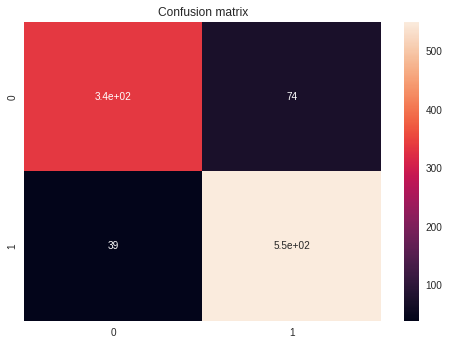

In [ ]:
clf = svm.SVC(class_weight = 'balanced')
clf.fit(Xtrain, ytrain)
trpred = clf.predict(Xtrain)
tpred = clf.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       1.00      0.81      0.89       411
           1       0.88      1.00      0.94       588

    accuracy                           0.92       999
   macro avg       0.94      0.90      0.92       999
weighted avg       0.93      0.92      0.92       999
 |
------------------------------------------------------------------------------|


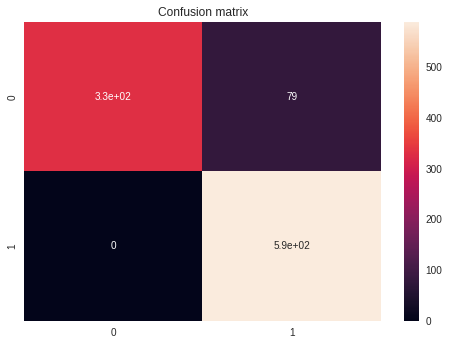

In [ ]:
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
#print_acc(gnb, Xtrain, Xtest, ytrain, ytest)
trpred = gnb.predict(Xtrain)
tpred = gnb.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.91      0.84      0.87       411
           1       0.89      0.94      0.92       588

    accuracy                           0.90       999
   macro avg       0.90      0.89      0.90       999
weighted avg       0.90      0.90      0.90       999
 |
------------------------------------------------------------------------------|


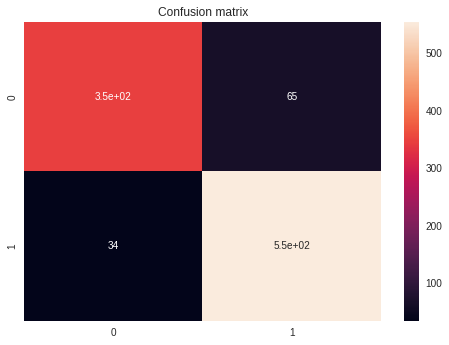

In [ ]:
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)
trpred = mnb.predict(Xtrain)
tpred = mnb.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       1.00      0.99      1.00       411
           1       0.99      1.00      1.00       588

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999
 |
------------------------------------------------------------------------------|


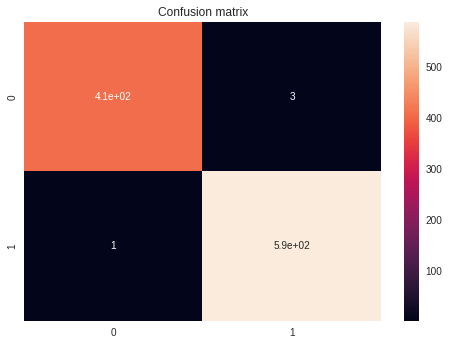

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, ytrain)
trpred = dtc.predict(Xtrain)
tpred = dtc.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.87      0.51      0.64       411
           1       0.73      0.95      0.83       588

    accuracy                           0.77       999
   macro avg       0.80      0.73      0.73       999
weighted avg       0.79      0.77      0.75       999
 |
------------------------------------------------------------------------------|


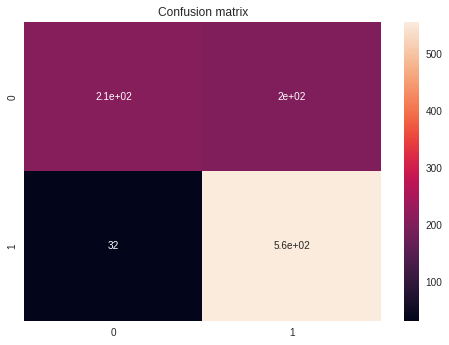

In [ ]:
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
trpred = knn.predict(Xtrain)
tpred = knn.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.98      0.54      0.70       411
           1       0.76      0.99      0.86       588

    accuracy                           0.81       999
   macro avg       0.87      0.77      0.78       999
weighted avg       0.85      0.81      0.79       999
 |
------------------------------------------------------------------------------|


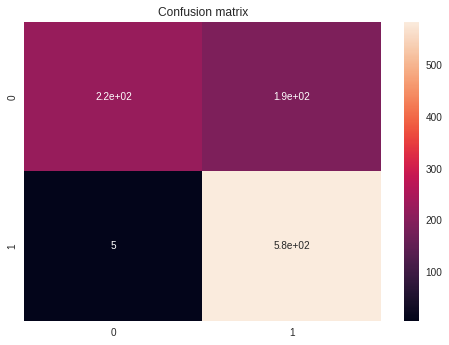

In [ ]:
rfc = RandomForestClassifier(n_jobs = -1, max_depth = 10, n_estimators = 50)
rfc.fit(Xtrain, ytrain)
trpred = rfc.predict(Xtrain)
tpred = rfc.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)